In [ ]:
import pandas as pd

In [ ]:
orders= pd.read_csv("food_orders_new_delhi.csv")
print(orders.head())

   Order ID Customer ID Restaurant ID  Order Date and Time  \
0         1       C8270         R2924  2024-02-01 01:11:52   
1         2       C1860         R2054  2024-02-02 22:11:04   
2         3       C6390         R2870  2024-01-31 05:54:35   
3         4       C6191         R2642  2024-01-16 22:52:49   
4         5       C6734         R2799  2024-01-29 01:19:30   

  Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0    2024-02-01 02:39:52         1914             0       Credit Card   
1    2024-02-02 22:46:04          986            40    Digital Wallet   
2    2024-01-31 06:52:35          937            30  Cash on Delivery   
3    2024-01-16 23:38:49         1463            50  Cash on Delivery   
4    2024-01-29 02:48:30         1992            30  Cash on Delivery   

  Discounts and Offers  Commission Fee  Payment Processing Fee  \
0            5% on App             150                      47   
1                  10%             198                  

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [ ]:
from datetime import datetime
orders['Order Date and Time']=pd.to_datetime(orders['Order Date and Time'])
orders['Delivery Date and Time']=pd.to_datetime(orders['Delivery Date and Time'])


In [ ]:
orders['Delivery Date and Time'].head()

0   2024-02-01 02:39:52
1   2024-02-02 22:46:04
2   2024-01-31 06:52:35
3   2024-01-16 23:38:49
4   2024-01-29 02:48:30
Name: Delivery Date and Time, dtype: datetime64[ns]

In [ ]:
def extract_discount(discount_str):
    if isinstance(discount_str, str):  # Check if the value is a string
        if 'off' in discount_str:
            # Fixed amount off
            return float(discount_str.split(' ')[0])
        elif '%' in discount_str:
            # Percentage off
            return float(discount_str.split('%')[0])
    # Handle missing or non-string values
    return 0.0
# apply the function to create a new 'Discount Value' column
orders['Discount Percentage'] = orders['Discounts and Offers'].apply(lambda x: extract_discount(x))

In [ ]:
print(orders[["Discounts and Offers",'Discount Percentage']])

    Discounts and Offers  Discount Percentage
0              5% on App                  5.0
1                    10%                 10.0
2           15% New User                 15.0
3                    NaN                  0.0
4           50 off Promo                 50.0
..                   ...                  ...
995            5% on App                  5.0
996                  NaN                  0.0
997                  NaN                  0.0
998         15% New User                 15.0
999         15% New User                 15.0

[1000 rows x 2 columns]


In [ ]:
orders['Discount Amount'] = orders.apply(lambda x: x['Order Value'] * x['Discount Percentage'] / 100 if 1 <= x['Discount Percentage'] <= 30
    else x['Discount Percentage'], axis=1)
print(orders[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head())

   Order Value Discounts and Offers  Discount Percentage  Discount Amount
0         1914            5% on App                  5.0            95.70
1          986                  10%                 10.0            98.60
2          937         15% New User                 15.0           140.55
3         1463                  NaN                  0.0             0.00
4         1992         50 off Promo                 50.0            50.00


In [ ]:
orders['Total Costs']=orders['Delivery Fee']+ orders['Discount Amount']+orders['Payment Processing Fee']
orders['Revenue']=orders['Commission Fee']
orders['Profit']=orders['Revenue']-orders['Total Costs']

#aggregrate the data
total_orders =orders.shape[0]
total_revenue=orders['Revenue'].sum()
total_profit=orders['Profit'].sum()
total_costs=orders['Total Costs'].sum()

overall_metrics={
    'Total Orders':total_orders,
    'Total Revenue':total_revenue,
    'Total Profit':total_profit,
    'Total Costs':total_costs
}
print(overall_metrics)


{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Profit': -5751.85, 'Total Costs': 132741.84999999998}


To better understand the distribution of costs, revenue, and profit, let’s plot:

A histogram of profits per order to visualize the distribution of profitable and unprofitable orders.
A pie chart to visualize the proportion of total costs (delivery fees, payment processing fees, and discounts).
A bar chart to compare total revenue, total costs, and total profit

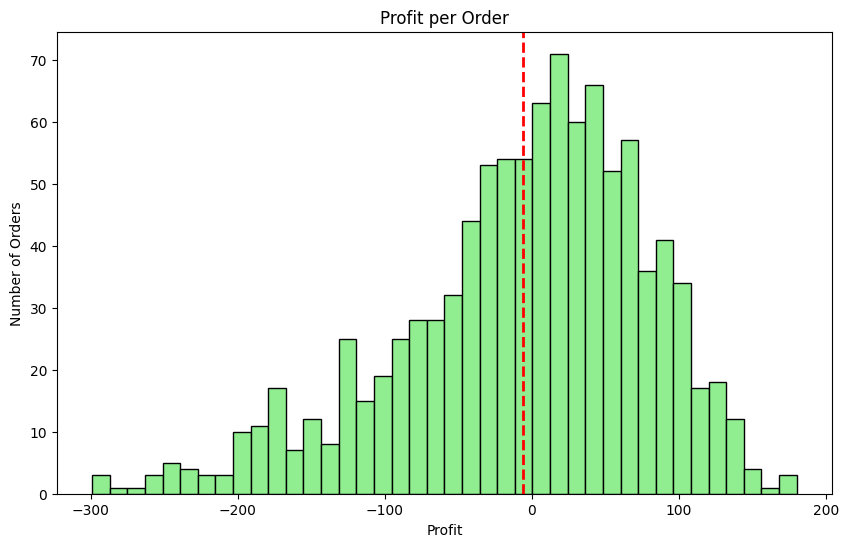

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(orders['Profit'], bins=40, color='lightgreen', edgecolor='black')
plt.title('Profit per Order')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(orders['Profit'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.show()

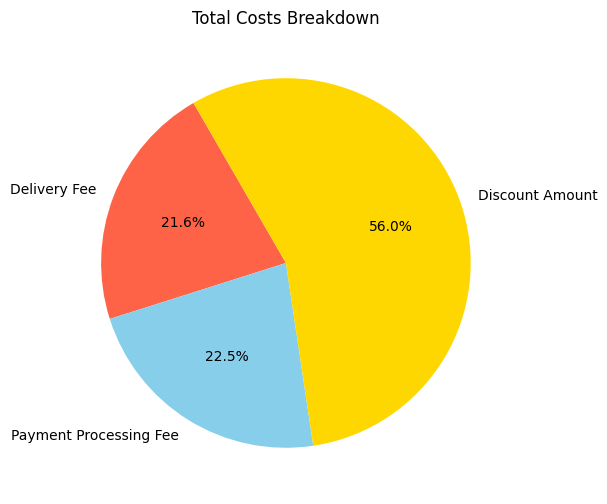

In [ ]:
costs_breakdown=orders[['Delivery Fee','Payment Processing Fee','Discount Amount']].sum()
plt.figure(figsize=(8, 6))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=120, colors=['tomato','skyblue','gold'])
plt.title('Total Costs Breakdown')
plt.show()

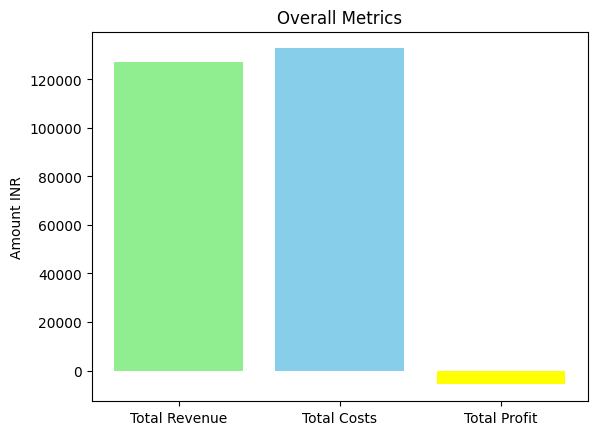

In [ ]:
totals=['Total Revenue','Total Costs','Total Profit']
values=[total_revenue,total_costs,total_profit]
plt.title('Overall Metrics')
plt.bar(totals,values,color=['lightgreen','skyblue','yellow'])
plt.ylabel('Amount INR')
plt.show()

**A New Strategy for Profits**

*   A new average commission percentage based on profitable orders.
*   A new average discount percentage for profitable orders, that could serve as a guideline for what level of discount still allows for profitability.




In [35]:
import warnings
warnings.filterwarnings('ignore')

profitable_orders = orders[orders['Profit'] > 0]


# calculate the average commission percentage for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

# calculate the average discount percentage for profitable orders
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

# calculate the new averages
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

# print the new averages
print("New Average Commission Percentage:", new_avg_commission_percentage)
print("New Average Discount Percentage:", new_avg_discount_percentage)


New Average Commission Percentage: 27.706528082159736
New Average Discount Percentage: 5.623712042253798


New Avg Commission Percentage: 27.7%

New Avg Discounr Percentage: 5.62%

The average commission percentage for profitable orders is significantly higher than the overall average across all orders. It suggests that a higher commission rate on orders might be a key factor in achieving profitability.

Now, let’s visualize a comparison of profitability using actual versus recommended discounts and commissions across all orders. For this, we need to:

Calculate the profitability per order using the actual discounts and commissions already present in the dataset.
Simulate profitability per order using the recommended discounts (6%) and commissions (28%) to see the potential impact on profitability.

In [32]:
# simulate profitability with recommended discounts and commissions
new_commission_percentage = 28  # 28% commission
new_discount_percentage = 6  # 6% discount

# calculate the simulated commission fee and discount amount using recommended percentages
orders['Simulated Commission Fee'] = orders['Order Value'] * (new_commission_percentage / 100)
orders['Simulated Discount Amount'] = orders['Order Value'] * (new_discount_percentage / 100)

# recalculate total costs and profit with simulated values
orders['Simulated Total Costs'] = (orders['Delivery Fee'] +
                                        orders['Payment Processing Fee'] +
                                        orders['Simulated Discount Amount'])

orders['Simulated Profit'] = (orders['Simulated Commission Fee'] -
                                   orders['Simulated Total Costs'])

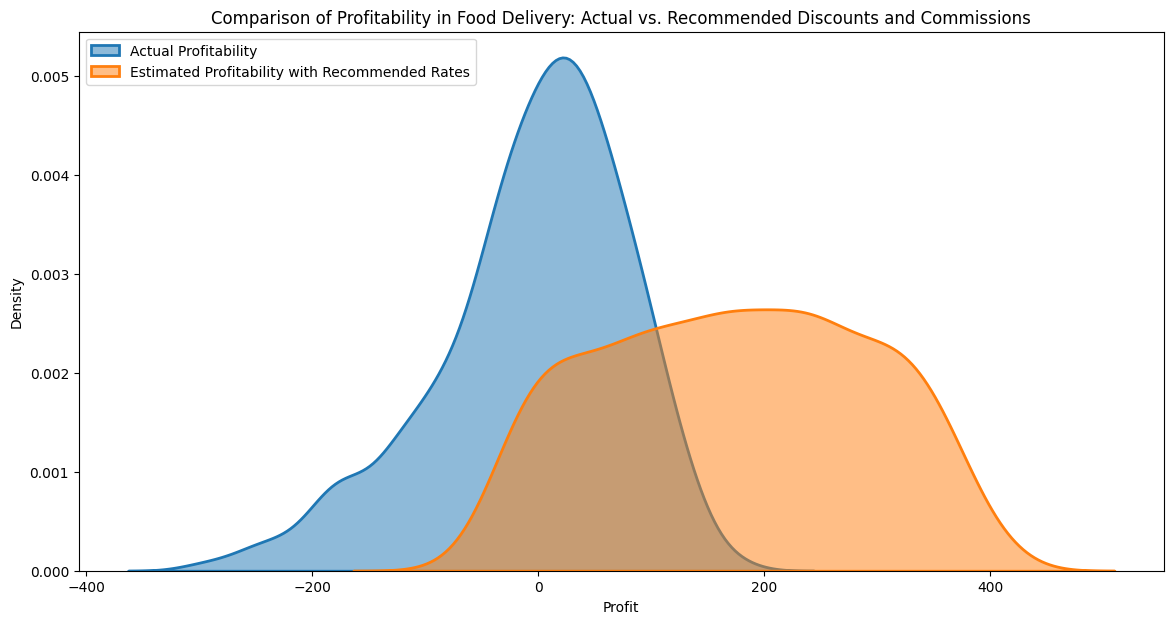

In [33]:
import seaborn as sns

plt.figure(figsize=(14, 7))

# actual profitability
sns.kdeplot(orders['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(orders['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

The actual profitability distribution shows a mix, with a significant portion of orders resulting in losses (profit < 0) and a broad spread of profit levels for orders. The simulated scenario suggests a shift towards higher profitability per order. The distribution is more skewed towards positive profit, indicating that the recommended adjustments could lead to a higher proportion of profitable orders.